In [1]:
### basic
import sys
sys.path.append('../')
from config_sing import *
from config_func import *
plt.style.use('seaborn-whitegrid')

You are in: Singularity: singularity_proj_combeffect
BASE DIRECTORY:     /mount/work
PATH OF SOURCE:     /mount/work/source
PATH OF EXECUTABLE: /mount/work/exe
PATH OF ANNOTATION: /mount/work/annotation
PATH OF PROJECT:    /mount/project
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc



In [2]:
from umap             import UMAP
from sklearn.manifold import TSNE

In [4]:
fdiry = os.path.join(FD_RES, "regulatory_landscape")
fname = "dat_output_ASTARR_zoom1_count_1e5.csv"
fpath = os.path.join(fdiry, fname)

dat_astarr = pd.read_csv(fpath)
print(dat_astarr.shape)
dat_astarr.head()

(100000, 281)


,Sample,Count,Fragment,Chrom,Start,End,Loc,Pct_GC,Input,Output,...,Mtf_MYB/1,Mtf_HINFP1/3,Mtf_ZNF435,Mtf_POU/2,Mtf_HD/17,Mtf_HD/9,Mtf_BCL6/1,Mtf_SOX/7,Mtf_HOMEZ,Mtf_HINFP1/2
0,Output_rep1,1,chrX_48780151_48780425,chrX,48780151,48780425,48780288,0.405109,-13.575177,-14.434689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Output_rep1,1,chrX_48780151_48780424,chrX,48780151,48780424,48780288,0.406593,-13.575177,-14.434689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Output_rep1,62,chrX_48780394_48780686,chrX,48780394,48780686,48780540,0.537671,-13.752054,-13.423511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Output_rep1,62,chrX_48780394_48780686,chrX,48780394,48780686,48780540,0.537671,-13.752054,-13.423511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Output_rep1,62,chrX_48780394_48780686,chrX,48780394,48780686,48780540,0.537671,-13.752054,-13.423511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
fdiry = os.path.join(FD_RES, "regulatory_landscape")
fname = "dat_output_TileMPRA_zoom1_count_1e4.csv"
fpath = os.path.join(fdiry, fname)

dat_tmpra = pd.read_csv(fpath)
print(dat_tmpra.shape)
dat_tmpra.head()

(10000, 279)


,Fragment,Chrom,Start,End,Loc,Pct_GC,Input,Output,Log2fc,Mtf_HD/2,...,Mtf_MYB/1,Mtf_HINFP1/3,Mtf_ZNF435,Mtf_POU/2,Mtf_HD/17,Mtf_HD/9,Mtf_BCL6/1,Mtf_SOX/7,Mtf_HOMEZ,Mtf_HINFP1/2
0,chrX_48780051_48780250,chrX,48780051,48780250,48780151,0.512563,490.329907,685.302462,0.480485,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chrX_48780251_48780450,chrX,48780251,48780450,48780351,0.356784,31.183412,218.676508,2.813741,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,chrX_48780251_48780450,chrX,48780251,48780450,48780351,0.356784,31.183412,218.676508,2.813741,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,chrX_48780251_48780450,chrX,48780251,48780450,48780351,0.356784,31.183412,218.676508,2.813741,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chrX_48780251_48780450,chrX,48780251,48780450,48780351,0.356784,31.183412,218.676508,2.813741,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Get matrix

In [7]:
### extract features
dat = dat_astarr
lst = [col for col in dat.columns if col.startswith('Mtf')]
dat = dat[lst]

### normalize into probability
dat = dat.apply(lambda x: x / np.sum(x), axis=1)

### assign
df1 = dat
print(df1.shape)
df1.head()

(100000, 270)


,Mtf_FOX/1,Mtf_HD/20,Mtf_ZNF449,Mtf_RFX/1,Mtf_ZFN121,Mtf_PAX/2,Mtf_YY1,Mtf_NFKB/2,Mtf_SPZ1,Mtf_SIX/2,...,Mtf_MYB/1,Mtf_HINFP1/3,Mtf_ZNF435,Mtf_POU/2,Mtf_HD/17,Mtf_HD/9,Mtf_BCL6/1,Mtf_SOX/7,Mtf_HOMEZ,Mtf_HINFP1/2
0,0.0,0.000000,0.020833,0.0,0.020833,0.020833,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.020833,0.0,0.020833,0.020833,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.033333,0.011111,0.0,0.033333,0.044444,0.011111,0.0,0.0,0.011111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.033333,0.011111,0.0,0.033333,0.044444,0.011111,0.0,0.0,0.011111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.033333,0.011111,0.0,0.033333,0.044444,0.011111,0.0,0.0,0.011111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
### extract features
dat = dat_tmpra
lst = [col for col in dat.columns if col.startswith('Mtf')]
dat = dat[lst]

### normalize into probability
dat = dat.apply(lambda x: x / np.sum(x), axis=1)

### assign
df2 = dat
print(df2.shape)
df2.head()

(10000, 270)


,Mtf_HD/2,Mtf_ZNF332,Mtf_POU/1,Mtf_MYB/5,Mtf_OSR2,Mtf_RFX/1,Mtf_GC-tract,Mtf_ZNF320,Mtf_KLF/SP/2,Mtf_TFAP2/1,...,Mtf_MYB/1,Mtf_HINFP1/3,Mtf_ZNF435,Mtf_POU/2,Mtf_HD/17,Mtf_HD/9,Mtf_BCL6/1,Mtf_SOX/7,Mtf_HOMEZ,Mtf_HINFP1/2
0,0.021277,0.021277,0.021277,0.021277,0.021277,0.021277,0.021277,0.042553,0.042553,0.042553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.035714,0.035714,0.035714,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.035714,0.035714,0.035714,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.035714,0.035714,0.035714,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.035714,0.035714,0.035714,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
dat_bow = df1
dat_tf  = dat_bow.apply(lambda x: x / np.sum(x), axis=1)
dat_idf = dat_bow.apply(lambda x: np.log(len(x) / np.sum(x != 0)), axis=0)
dat_tfidf = dat_tf * dat_idf
dat_tfidf.head()

,Mtf_FOX/1,Mtf_HD/20,Mtf_ZNF449,Mtf_RFX/1,Mtf_ZFN121,Mtf_PAX/2,Mtf_YY1,Mtf_NFKB/2,Mtf_SPZ1,Mtf_SIX/2,...,Mtf_MYB/1,Mtf_HINFP1/3,Mtf_ZNF435,Mtf_POU/2,Mtf_HD/17,Mtf_HD/9,Mtf_BCL6/1,Mtf_SOX/7,Mtf_HOMEZ,Mtf_HINFP1/2
0,0.0,0.000000,0.023752,0.0,0.014063,0.025680,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.023752,0.0,0.014063,0.025680,0.000000,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.023019,0.012668,0.0,0.022500,0.054784,0.011741,0.0,0.0,0.05625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.023019,0.012668,0.0,0.022500,0.054784,0.011741,0.0,0.0,0.05625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.023019,0.012668,0.0,0.022500,0.054784,0.011741,0.0,0.0,0.05625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X = dat_tfidf.to_numpy()
print(X.shape)

(100000, 270)


In [11]:
%%time
ump = UMAP(metric="cosine", n_neighbors=15, n_jobs=8)
X_ump = ump.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/umap/spectral.py:261: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/usr/local/lib/python3.6/dist-packages/umap/spectral.py:261: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/usr/local/lib/python3.6/dist-packages/umap/spectral.py:261: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: sp

CPU times: user 14min 59s, sys: 10.6 s, total: 15min 9s
Wall time: 3min 15s


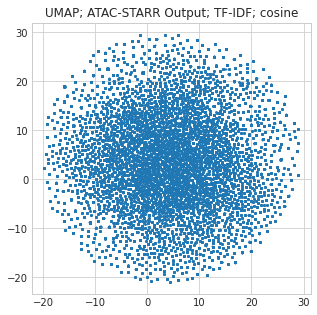

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))

x = X_ump[:,0]
y = X_ump[:,1]
ax.scatter(x, y, s=1)
ax.set_title("UMAP; ATAC-STARR Output; TF-IDF; cosine")
plt.show()

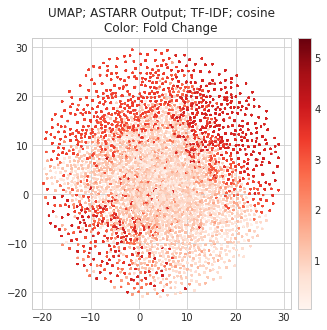

In [28]:
fig, ax = plt.subplots(figsize=(5, 5))

c = dat_astarr["Log2fc"]
c = np.exp2(c.to_numpy())
#c = c.to_numpy()

x = X_ump[:,0]
y = X_ump[:,1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds")
ax.set_title("UMAP; ASTARR Output; TF-IDF; cosine\nColor: Fold Change")
set_colorbar(ax, im) 
plt.show()

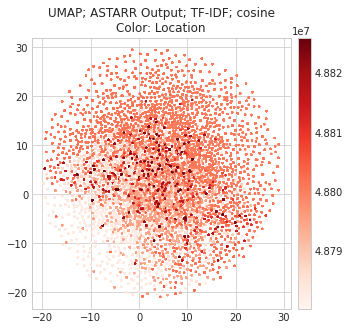

In [30]:
fig, ax = plt.subplots(figsize=(5, 5))


c = dat_astarr["Loc"]

x = X_ump[:,0]
y = X_ump[:,1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds")
ax.set_title(f"UMAP; ASTARR Output; TF-IDF; cosine\nColor: Location" )
set_colorbar(ax, im) 
plt.show()

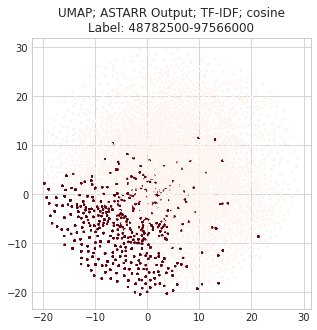

In [32]:
fig, ax = plt.subplots(figsize=(5, 5))

x1  = 48782500
x2  = x1 + 1000
c = dat_astarr["Loc"]
c = (c > x1) & (c < (x2))
#c = c.to_numpy()

x = X_ump[:,0]
y = X_ump[:,1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds", alpha=0.5)
ax.set_title(f"UMAP; ASTARR Output; TF-IDF; cosine\nLabel: {x1}-{x1+x2}" )
#set_colorbar(ax, im) 
plt.show()

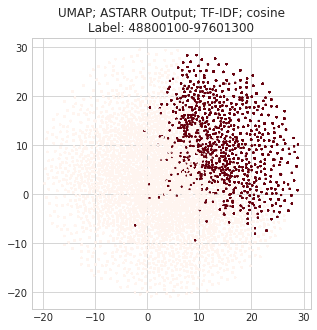

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))

x1  = 48800000 + 100
x2  = x1 + 1100
c = dat_astarr["Loc"]
c = (c > x1) & (c < (x2))
#c = c.to_numpy()

x = X_ump[:,0]
y = X_ump[:,1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds", alpha=0.5)
ax.set_title(f"UMAP; ASTARR Output; TF-IDF; cosine\nLabel: {x1}-{x1+x2}" )
#set_colorbar(ax, im) 
plt.show()

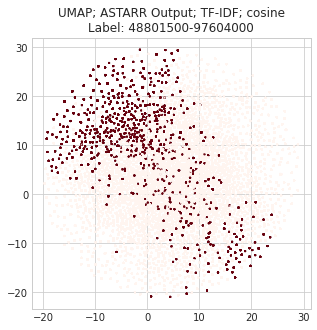

In [34]:
fig, ax = plt.subplots(figsize=(5, 5))

x1  = 48801500
x2  = x1 + 1000
c = dat_astarr["Loc"]
c = (c > x1) & (c < (x2))
#c = c.to_numpy()

x = X_ump[:,0]
y = X_ump[:,1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds", alpha=0.5)
ax.set_title(f"UMAP; ASTARR Output; TF-IDF; cosine\nLabel: {x1}-{x1+x2}" )
#set_colorbar(ax, im) 
plt.show()